## Introduction

In this kernal Iam going to explain the famous Titanic Challenge. The challenge is to use machine learning to create a model that predicts which passengers survived the Titanic shipwreck

I have tried out 2 approches, 
<br>Approach 1 can be found in the notebook with title - 'Titanic_Approach-1'
<br>Approach 2 is explained in this notebook, other part of this approach can be found in another notebook with title 'Titanic_Approach-2_Part-II'

                                                PART-1

1)Imported libraries

2)Checked the data types

3)Extracted 'NAME' column from both train and test datasets. A column 'Title' is created and the extracted names are put in that column. For each title checked for 'SEX' column if a name is male or female 

4)Split the table with reference to the Title column which has 5 values that are mr,mrs,miss,master,rare resulting into 5 tables

5)Then filled the NAN values with mean() for the respective tables(mr,mrs,miss,master,rare)

6)After filling,the 5 tables(mr,mrs,miss,master,rare) were joined

7)Removed the columns which had duplicates and less correlation with dependent variable

8)Uploaded the file to csv for the continuation of  part-2

9)Assigned the LabelEncoder and OneHotEncoder to the categorical varibles

10)Ran few machine learning algorithms(Random Forest,Decision Tree,Logistic Regression,KNN,Support Vector Machines,Naive Bayes,Stochastic Gradient Decent) on the data

By following all these steps I got an below Accuracy for respective models

**Score	     Model-1**
<br>83.21	Random Forest
<br>83.21	Decision Tree
<br>78.36	Support Vector Machines
<br>78.36	Logistic Regression
<br>77.99	Naive Bayes
<br>73.51	Stochastic Gradient Decent
<br>54.48	KNN

**Import Libraries**

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**load the datasets where** 
1. **a** is a train dataset and 
2. **b** is a test dataset

In [2]:
a=pd.read_csv('train (1).csv')
b=pd.read_csv('test.csv')
a.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Data Exploration/Analysis**

In [3]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**The training-set has 891 records and 11 features + the target variable (survived). 2 of the features are floats, 5 are integers and 5 are objects. Below I have listed the features with a short description:**

Survived: Dependent variable - whether a passenger survived or not
<br>PassengerId: Unique Id of a passenger
pclass: Ticket class    
sex:    Sex 
Age:    Age in years    
sibsp:  # of siblings / spouses aboard the Titanic  
parch:  # of parents / children aboard the Titanic  
ticket: Ticket number   
fare:   Passenger fare  
cabin:  Cabin number    
embarked:   Port of Embarkation

In [4]:
a.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Above we can see that 38% out of the training-set survived the Titanic. 
<br>We can also see that the passenger ages range from 0.4 to 80. On top of that we can already detect some features, that contain missing values, like the 'Age' feature.**

**extracting the NAME column in both train and test datasets and keeping it in 'Title' column, then checked the male and female of the each titlename**


In [5]:
combine=[a,b]
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(a['Title'], a['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


**From the crosstab, whereever count of female/male is found in single digits, I replaced the title to Rare.Then taking the survived rate of the Title with the mean**

In [6]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
    'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
a[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


**we are checking the count of people on the ship by 'Title'**

In [7]:
a[['Title', 'Survived']].groupby(['Title'], as_index=False).count()

,Title,Survived
0,Master,40
1,Miss,185
2,Mr,517
3,Mrs,126
4,Rare,23


**we are checking the count of people survived by 'Title'**

In [8]:
a[['Title', 'Survived']].groupby(['Title'], as_index=False).sum()

,Title,Survived
0,Master,23
1,Miss,130
2,Mr,81
3,Mrs,100
4,Rare,8


**we are creating new 5 variables to split the data**

In [9]:
T=a['Title'].unique()

**we split the traindataset table with 'Title' column that has 'mr','mrs','miss','master' and 'rare'. The missing values of 'Age'column of the each table are filled with 'Age' column of mean of their respective tables. After that the 5 tables are combined to 1 complete table of a1**

In [10]:
res=[]
for Tech in T:
    tmp=a[a['Title']==Tech]
    tmp['Age']=tmp.Age.fillna(tmp.Age.mean())
    res.append(tmp)

    
a1=pd.concat(res,sort=True)    

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


**creating title colum and its mapping in both train and test sets**

In [ ]:
combine=[a1,b1]
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

a1.head()

In [13]:
a1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 886
Data columns (total 13 columns):
Age            891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Fare           891 non-null float64
Name           891 non-null object
Parch          891 non-null int64
PassengerId    891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
SibSp          891 non-null int64
Survived       891 non-null int64
Ticket         891 non-null object
Title          891 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 97.5+ KB


In [ ]:
b1.info()

**Droping the columns of Ticket,Cabin,Name,PassengerId in both the tables of a1 and b1**

In [15]:
a1 = a1.drop(['Ticket', 'Cabin','Name', 'PassengerId'], axis=1)
b1 = b1.drop(['Ticket', 'Cabin','Name'], axis=1)
a1.shape,b1.shape

((891, 9), (418, 9))

**filling the missing value of Fare column with Mean in b1 table**

In [16]:
b1['Fare']=b1.Fare.fillna(b1.Fare.mean())

**changing datatype of 'Age','Fare' columns to int in both tables of a1 and b1**

In [17]:
combine=[a1,b1]
for dataset in combine:
    dataset['Age']=dataset['Age'].astype(int)
    dataset['Fare']=dataset['Fare'].astype(int)

**Embarked column has Null values.so checking the details of the Embarked column**

In [18]:
a['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

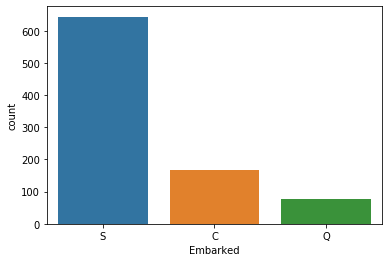

In [19]:
import seaborn as sns
sns.countplot(x='Embarked',data=a)
plt.show()

**In Embarked column most frequent port is 'S'.so we are filling the Null values with 'S'**

In [20]:
common_value = 'S'
combine = [a1,b1]

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [21]:
combine = [a1, b1]

for dataset in combine:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

**mapping 'Embarked' column S,C,Q to 0,1,2 in both train and test sets**

In [22]:
ports = {"S": 0, "C": 1, "Q": 2}
combine = [a1, b1]

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

**mapping 'Sex' column : male,female to 0,1**

In [23]:
genders = {"male": 0, "female": 1}
combine = [a1, b1]

for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [24]:
a1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 886
Data columns (total 9 columns):
Age         891 non-null int32
Embarked    891 non-null int64
Fare        891 non-null int32
Parch       891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
SibSp       891 non-null int64
Survived    891 non-null int64
Title       891 non-null int64
dtypes: int32(2), int64(7)
memory usage: 62.6 KB


In [25]:
b1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 414
Data columns (total 9 columns):
Age            418 non-null int32
Embarked       418 non-null int64
Fare           418 non-null int32
Parch          418 non-null int64
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
SibSp          418 non-null int64
Title          418 non-null int64
dtypes: int32(2), int64(7)
memory usage: 29.4 KB


**uploading the files for the continuation of the part-2**

In [31]:
a1.to_csv('train_processed_continous.csv')
a1.head()

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived,Title
0,22,0,7,0,3,0,1,0,1
4,35,0,8,0,3,0,0,0,1
5,32,2,8,0,3,0,0,0,1
6,54,0,51,0,1,0,0,0,1
12,20,0,8,0,3,0,0,0,1


In [37]:
b1.to_csv('test_processed_continous.csv')
b1.head()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Title
0,34,2,7,0,892,3,0,0,1
2,62,2,9,0,894,2,0,0,1
3,27,0,8,0,895,3,0,0,1
5,14,0,9,0,897,3,0,0,1
7,26,0,29,1,899,2,0,1,1


**droping the 'Survived' column in a2 and 'PassengerId' column in b1**

In [29]:
a2=a1.drop('Survived',axis=1)
b1=b1.drop('PassengerId',axis=1)
a2.shape,b1.shape

((891, 8), (418, 8))

**converting the dataframe into array format**

In [31]:
a_array=a2.iloc[:,0:8].values
b_array=b1.iloc[:,0:8].values
a_array

array([[22,  0,  7, ...,  0,  1,  1],
       [35,  0,  8, ...,  0,  0,  1],
       [32,  2,  8, ...,  0,  0,  1],
       ...,
       [38,  0,  0, ...,  0,  0,  5],
       [28,  0, 33, ...,  0,  0,  5],
       [27,  0, 13, ...,  0,  0,  5]], dtype=int64)

In [32]:
b_array

array([[ 34,   2,   7, ...,   0,   0,   1],
       [ 62,   2,   9, ...,   0,   0,   1],
       [ 27,   0,   8, ...,   0,   0,   1],
       ...,
       [ 47,   1, 227, ...,   0,   1,   5],
       [ 53,   0,  81, ...,   0,   1,   5],
       [ 39,   1, 108, ...,   1,   0,   5]], dtype=int64)

### importing the OneHotEncoder

In [33]:
from sklearn.preprocessing import OneHotEncoder
one_array=OneHotEncoder()

In [35]:
cols=[1,4,7]

**fitting the train dataset of (a_array)**

In [36]:
one_array.fit(a_array[:,cols])

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='error',
              n_values=None, sparse=True)

**Transforming the train dataset(a_array)**

In [37]:
a2_encoded=one_array.transform(a_array[:,cols])

**Transforming the test dataset(b_array)**

In [38]:
b1_encoded=one_array.transform(b_array[:,cols])

In [39]:
a2_encoded.shape

(891, 11)

In [40]:
b1_encoded.shape

(418, 11)

In [41]:
X_train = a2_encoded
Y_train = a1["Survived"]
X_test  = b1_encoded

In [42]:
# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_train,Y_train,test_size=0.3,random_state=1,shuffle=True)

In [44]:
from sklearn.metrics import accuracy_score

In [57]:
# stochastic gradient descent (SGD) learning
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)    #number of times trained in dataset
sgd.fit(x_train, y_train)
Y_pred = sgd.predict(x_test)

acc_sgd = round(accuracy_score(y_test, Y_pred) * 100, 2)

print(round(acc_sgd,2,), "%")

73.51 %


In [58]:
sgd.score(x_test,y_test)

0.7350746268656716

In [72]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)

Y_prediction = random_forest.predict(x_test)

acc_random_forest = round(accuracy_score(y_test,Y_prediction) * 100, 2)
print(round(acc_random_forest,2,), "%")

83.21 %


In [73]:
random_forest.score(x_test,y_test)

0.832089552238806

In [74]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

Y_pred = logreg.predict(x_test)

acc_log = round(accuracy_score(y_test, Y_pred) * 100, 2)
print(round(acc_log,2,), "%")

78.36 %


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [75]:
logreg.score(x_test,y_test)

0.7835820895522388

In [76]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

acc_knn = round(accuracy_score(y_test,y_pred) * 100, 2)
print(round(acc_knn,2,), "%")

54.48 %


In [77]:
knn.score(x_test,y_test)

0.5447761194029851

In [78]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(x_train.toarray(), y_train)

y_pred = gaussian.predict(x_test.toarray())

acc_gaussian = round(accuracy_score(y_test,y_pred) * 100, 2)
print(round(acc_gaussian,2,), "%")

77.99 %


In [79]:
gaussian.score(x_test.toarray(),y_test)

0.7798507462686567

In [80]:
# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)

Y_pred = linear_svc.predict(x_test)

acc_linear_svc = round(accuracy_score(y_test,Y_pred) * 100, 2)
print(round(acc_linear_svc,2,), "%")

78.36 %


In [81]:
linear_svc.score(x_test,y_test)

0.7835820895522388

In [82]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)

Y_pred = decision_tree.predict(x_test)

acc_decision_tree = round(accuracy_score(y_test,Y_pred) * 100, 2)
print(round(acc_decision_tree,2,), "%")

83.21 %


In [83]:
decision_tree.score(x_test,y_test)

0.832089552238806

In [84]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes',  
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log,                #in this cells the score are (x_test,y_test)
              acc_random_forest, acc_gaussian,                 #Parch,Sibsp,Age,Fare are continuos
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
83.21,Random Forest
83.21,Decision Tree
78.36,Support Vector Machines
78.36,Logistic Regression
77.99,Naive Bayes
73.51,Stochastic Gradient Decent
54.48,KNN
